Sequence Alignment : metode buat nyusun rantai DNA, RNA, protein untuk mengidentifikasi tingkat kemiripan

ilmu homology(ancestry test)  
Istilah:
1. Match
2. Mismatch
3. Gap


- Global Alignment = biasanya dari ujung ke ujung

- Local Alignment = panjang Sequence berebeda, salah satu sequencenya adalah bagian dari sequence lainnya, keduanya mirip di satu bagian kecil 

- similarity
- Hamming Distance: langkah yang diperlukan buat ngubah 1 sequence menjadi sequence lainnya(insert, switch, delete)
Panjang sequencenya sama
- Levenshtein distance: panajang sequencenya berbeda
- Dotplot

In [1]:
!pip install BioPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.9 MB/s eta 0:00:00


In [2]:
import Bio
from Bio.Seq import Seq

seqa = Seq('ATGCATCAGCATCGATCGATC')
seqb = Seq('GACTAGCTGACTAGCTGAACT')

from Bio import pairwise2
from Bio.pairwise2 import format_alignment
alignmentglobal = pairwise2.align.globalxx(seqa,seqb)
for a in alignmentglobal:
  print(format_alignment(*a))

ATGCATC-AGCATCGA-T--C-GAT-C-
  | | | ||| | || |  | ||  | 
--G-A-CTAGC-T-GACTAGCTGA-ACT
  Score=14

ATGCA-TCAGCATCGA-T--C-GAT-C-
  | | | ||| | || |  | ||  | 
--G-ACT-AGC-T-GACTAGCTGA-ACT
  Score=14

ATG-CATCAGCATCGA-T--C-GAT-C-
  | | | ||| | || |  | ||  | 
--GAC-T-AGC-T-GACTAGCTGA-ACT
  Score=14

-ATGCATCAGCATCGA-T--C-GAT-C-
 |  | | ||| | || |  | ||  | 
GA--C-T-AGC-T-GACTAGCTGA-ACT
  Score=14

ATGCATC-AGCATCGA-T--C-GATC-
  | | | ||| | || |  | ||.| 
--G-A-CTAGC-T-GACTAGCTGAACT
  Score=14

ATGCA-TCAGCATCGA-T--C-GATC-
  | | | ||| | || |  | ||.| 
--G-ACT-AGC-T-GACTAGCTGAACT
  Score=14

ATG-CATCAGCATCGA-T--C-GATC-
  | | | ||| | || |  | ||.| 
--GAC-T-AGC-T-GACTAGCTGAACT
  Score=14

-ATGCATCAGCATCGA-T--C-GATC-
 |  | | ||| | || |  | ||.| 
GA--C-T-AGC-T-GACTAGCTGAACT
  Score=14

ATGCATC-AGCATCGA-T--C-G-ATC-
  | | | ||| | || |  | | | | 
--G-A-CTAGC-T-GACTAGCTGAA-CT
  Score=14

ATGCA-TCAGCATCGA-T--C-G-ATC-
  | | | ||| | || |  | | | | 
--G-ACT-AGC-T-GACTAGCTGAA-CT
  Score=14

ATG-CATCAGCATCGA-T--C-

/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
seqc = ("ACTGATCA")
seqd = ("TACGA")
alignmentlocal = pairwise2.align.localxx(seqc, seqd)

for b in alignmentlocal :
  print(format_alignment(*b))

3 TGATC-A
  | | | |
1 T-A-CGA
  Score=4

1 ACTGATCA
  || |   |
2 AC-G---A
  Score=4

1 ACTGA
  || ||
2 AC-GA
  Score=4



In [4]:
globalscore =  pairwise2.align.globalxx(seqa,seqb, one_alignment_only = True, score_only = True)
print(globalscore/len(seqa)*100)
localscore = pairwise2.align.localxx(seqc, seqd, one_alignment_only = True, score_only = True)
print(localscore/len(seqc)*100)

66.66666666666666
50.0


In [5]:
# Match: 2 point
# Mismatch: -1 point
# Open gap: -0.5 point
# Extend gap: -0.1 point

# Global alignment with maximum similarity score
seqa = Seq('ACTGACT')
seqb = Seq('TACG')
globalalignment = pairwise2.align.globalms(seqa, seqb, 2, -1, -0.5, -0.1)
for a in globalalignment:
  print(format_alignment(*a))

-ACTGACT
 || |   
TAC-G---
  Score=4.3



In [6]:
def hamming_distance(seqX, seqY) :
  return len([(x,y) for (x,y) in zip(seqX, seqY) if x!=y])
print(hamming_distance(seqa,seqb))

3


In [7]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.4 MB/s eta 0:00:00


In [8]:
from Levenshtein import distance
distance(seqc, seqd)

5

In [9]:
def check(x,y):
  return 0 if(x==y) else 1

def create_matrix(seqX, seqY):
  matrix = []
  for x in seqX:
    row = []
    for y in seqY:
      row.append(check(x,y))
    matrix.append(row)
  return matrix

def display(matrix, seqX, seqY):
  print('  |'+ seqY)
  print('='*(len(seqY)+3))
  for label, row in zip(seqX, matrix):
    line = ''.join('X' if s < 1 else ' ' for s in row)  
    print(label + '  |'+ line)

matrix = create_matrix(seqa, seqb)

display(matrix, seqa, seqb)

  |TACG
A  | X  
C  |  X 
T  |X   
G  |   X
A  | X  
C  |  X 
T  |X   


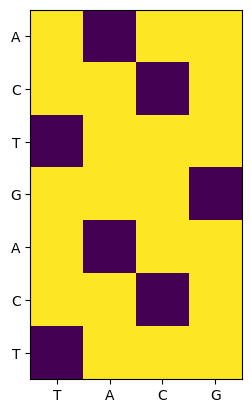

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(matrix))
xt = plt.xticks(np.arange(len(list(seqb))),list(seqb))
yt = plt.yticks(np.arange(len(list(seqa))),list(seqa))